In [1]:
%matplotlib inline

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [36]:
G  = np.zeros((8,9))
s2 = np.sqrt(2)
#s2 = 2
for i in range(3):
    i1 = i+1
    G[i+3, i*3:3*i1] = 1
    G[i, i:9:3] = 1
G[7,8] = s2
G[6, 0:9:4] = s2 

print(G)

[[1.    0.    0.    1.    0.    0.    1.    0.    0.   ]
 [0.    1.    0.    0.    1.    0.    0.    1.    0.   ]
 [0.    0.    1.    0.    0.    1.    0.    0.    1.   ]
 [1.    1.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    1.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    1.    1.   ]
 [1.414 0.    0.    0.    1.414 0.    0.    0.    1.414]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.414]]


In [39]:
[u, s, v] = np.linalg.svd(G)
v = v.T
n = u.shape[0]
m = v.shape[0]
p = np.linalg.matrix_rank(G)
up = u[:, 0:p]
vp = v[:, 0:p]
sp = s[0:p]

sm = np.eye(p,p)
for i in range(p):
    sm[i,i] = sp[i]
smi = np.linalg.inv(sm)


Cm = s[0]/s[-1]
#print(Cm)
Cmp = sp[0]/sp[-1]
#print(Cmp)

print(v)
#print(u[:,p:m].T)


[[ 0.467  0.354  0.014  0.378  0.436  0.331  0.218 -0.367  0.18 ]
 [ 0.158  0.354 -0.278 -0.378  0.337 -0.247 -0.537 -0.18  -0.367]
 [ 0.176 -0.     0.306 -0.189  0.536 -0.403  0.237  0.546  0.187]
 [ 0.158  0.354  0.278  0.378 -0.337 -0.247 -0.537  0.18   0.367]
 [ 0.467  0.354 -0.014 -0.378 -0.436  0.331  0.218  0.367 -0.18 ]
 [ 0.176 -0.     0.57  -0.189 -0.237 -0.403  0.237 -0.546 -0.187]
 [ 0.176  0.    -0.292  0.567 -0.1   -0.403  0.237  0.187 -0.546]
 [ 0.176  0.    -0.584 -0.189 -0.199 -0.403  0.237 -0.187  0.546]
 [ 0.625 -0.707 -0.     0.    -0.     0.084 -0.32   0.     0.   ]]


Row Space


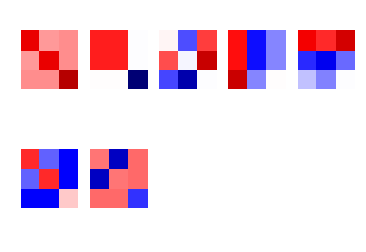

Null Space
[-0.367 -0.18   0.546  0.18   0.367 -0.546  0.187 -0.187  0.   ]
[ 0.18  -0.367  0.187  0.367 -0.18  -0.187 -0.546  0.546  0.   ]


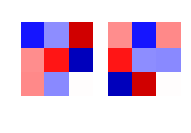

In [40]:
# plot row and null spaces
rsmax = np.max(v[:,0:p])
rsmin = np.min(v[:,0:p])
nsmax = np.max(v[:,p:m])
nsmin = np.min(v[:,p:m])

print('Row Space')
for i in range(p):
    idx = 250+1+i
    ax=plt.subplot(idx)
    x = np.reshape(v[:,i], (3,3))
    plt.pcolor(np.flipud(x), cmap='seismic',vmin=-0.8, vmax=0.8)
    plt.axis('off')
    plt.axis('equal')
plt.show()

print('Null Space')
for i in range(m-p):
    idx = 240+1+i
    ax=plt.subplot(idx)
    x = np.reshape(v[:,p+i], (3,3))
    print(v[:,p+i])
    plt.pcolor(np.flipud(x), cmap='seismic',vmin=-0.8, vmax=0.8)
    plt.axis('off')
    plt.axis('equal')

plt.show()


(10, 9)


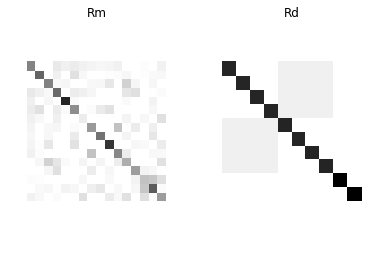

In [207]:
# plot data and model resolution

Rm = np.dot(vp,vp.T)
Rd = np.dot(up,up.T)
print(up.shape)

ax=plt.subplot(121)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.pcolor(np.flipud(Rm), cmap='Greys', vmin=0, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('Rm')

ax=plt.subplot(122)
plt.tick_params(axis="True", which="both", bottom="True", top="False", 
               labelbottom="True", left="True", right="False", labelleft="True")
plt.pcolor(np.flipud(Rd), cmap='Greys', vmin=0, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('Rd')
plt.show()










[[1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.41421356]
 [1.41421356]]


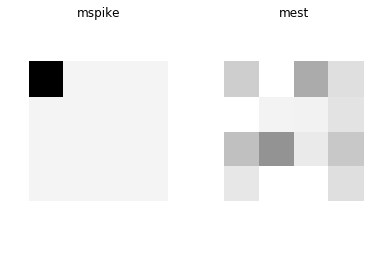

In [211]:
mspike = np.zeros((m,1))
#mspike[np.array([5, 6, 9,10])] = 1
mspike[np.array([0])] = 1
dspike = np.dot(G,mspike)
Gt     = np.dot(np.dot(vp,smi), up.T)
mest   = np.dot(Gt, dspike)
print(dspike)

mspike = np.reshape(mspike, (4,4))
mest   = np.reshape(mest, (4,4))

ax=plt.subplot(121)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.pcolor(np.flipud(mspike), cmap='Greys', vmin=-.1, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('mspike')

ax=plt.subplot(122)
plt.pcolor(np.flipud(mest), cmap='Greys', vmin=-.1, vmax=1)
plt.axis('off')
plt.axis('equal')
plt.title('mest')
plt.show()
